<a href="https://colab.research.google.com/github/NMWrobotics/olympic_medal_predictor/blob/main/olympic_medal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
teams = pd.read_csv("/content/sample_data/teams.csv")

In [ ]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [ ]:
numericTeams = teams.select_dtypes(include=['number'])
numericTeams
numericTeams.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

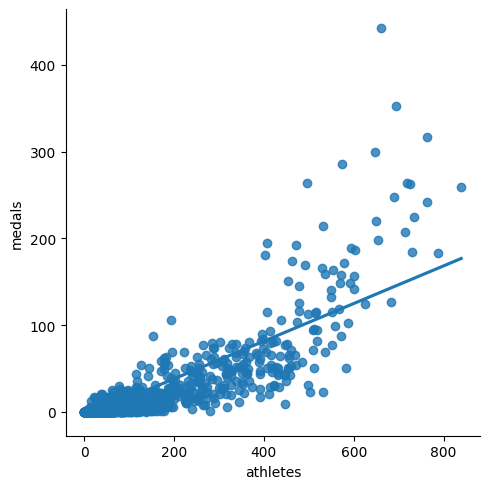

In [ ]:
sns.lmplot(x="athletes",y="medals",data=teams, fit_reg=True, ci=None)

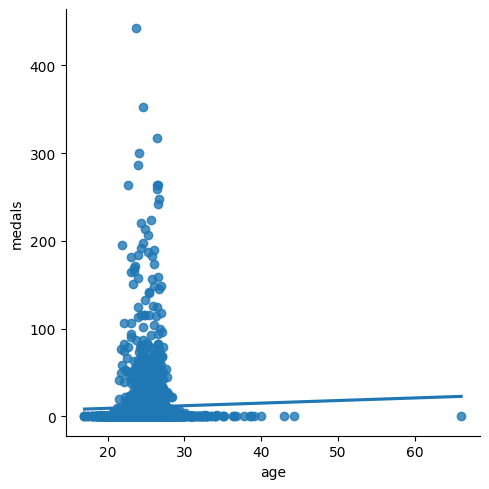

In [ ]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

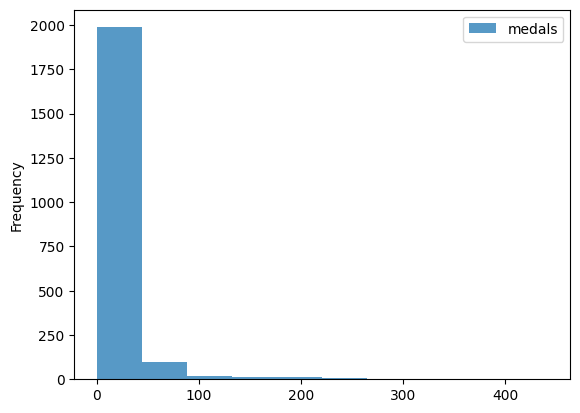

In [ ]:
teams.plot.hist(y="medals", bins=10, alpha=0.75)

In [ ]:
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [ ]:
teams = teams.dropna()

In [ ]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [ ]:
trainData = teams[teams["year"] < 2012].copy()
testData = teams[teams["year"] >= 2012].copy()

In [ ]:
trainData.shape

(1609, 7)

In [ ]:
testData.shape

(405, 7)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
predictors = ["athletes","prev_medals"]

reg.fit(trainData[predictors],trainData["medals"])

predictions = reg.predict(testData[predictors])

In [ ]:
predictions.shape

(405,)

In [ ]:
testData["predictions"] = predictions

In [ ]:
testData

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [ ]:
testData.loc[testData["predictions"] < 0, "predictions"] = 0
testData["predictions"] = testData["predictions"].round()

In [ ]:
testData

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [ ]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(testData["medals"], testData["predictions"])
error

3.2987654320987656

In [ ]:
testData.describe()["medals"]

count    405.000000
mean       9.785185
std       28.820300
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max      264.000000
Name: medals, dtype: float64

In [ ]:
newData = pd.DataFrame({'team':["USA"], 'country':["United States"],'year':[2020],'athletes':[415],	'age':[24],	'prev_medals':[264]	})

In [ ]:
predicted_medals = reg.predict(newData[predictors])
print(f"Predicted Medal Count for 2028: {predicted_medals[0]}")

Predicted Medal Count for 2028: 225.78013175119057
